In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df_conf=pd.read_csv('C:/Users/Dell/Desktop/data/time_series_covid_19_confirmed.csv')
df_death=pd.read_csv('C:/Users/Dell/Desktop/data/time_series_covid_19_deaths.csv')
df_rec=pd.read_csv('C:/Users/Dell/Desktop/data/time_series_covid_19_recovered.csv')

In [299]:
df_conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,NaN
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,414,414,418,418,422,426,428,428,429,NaN
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,NaN
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,102,119,120,124,124,125,0.0


In [300]:
dates = ['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', 
         '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', 
         '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', 
         '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20','2/20/20','2/21/20','2/22/20','2/23/20','2/24/20','2/25/20','2/26/20','2/27/20','2/28/20','2/29/20','3/1/20','3/2/20','3/3/20','3/4/20',
           '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20']

In [301]:
conf_df_long = df_conf.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = df_death.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_df_long = df_rec.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

full_table = pd.concat([conf_df_long, deaths_df_long['Deaths'], recv_df_long['Recovered']], 
                       axis=1,sort=False)

In [302]:
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [303]:
full_table.dtypes


Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [304]:
#for set date in corrrect format
full_table.Date=pd.to_datetime(full_table.Date)

In [305]:
full_table['Country/Region']=full_table['Country/Region'].replace('Mainland China','China')

In [306]:
full_table[['Confirmed', 'Deaths', 'Recovered']] = full_table[['Confirmed', 'Deaths', 'Recovered']].fillna(0)
full_table[['Province/State']] = full_table[['Province/State']].fillna('NA')

In [307]:
#analysis only for china
df_china=full_table[full_table['Country/Region']=='China']

In [308]:
df_china.head()
full_table.shape

(19796, 8)

In [309]:
china_datewise = df_china.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
china_datewise.head()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,547,17,28
1,2020-01-23,639,18,30
2,2020-01-24,916,26,36
3,2020-01-25,1399,42,39
4,2020-01-26,2062,56,49


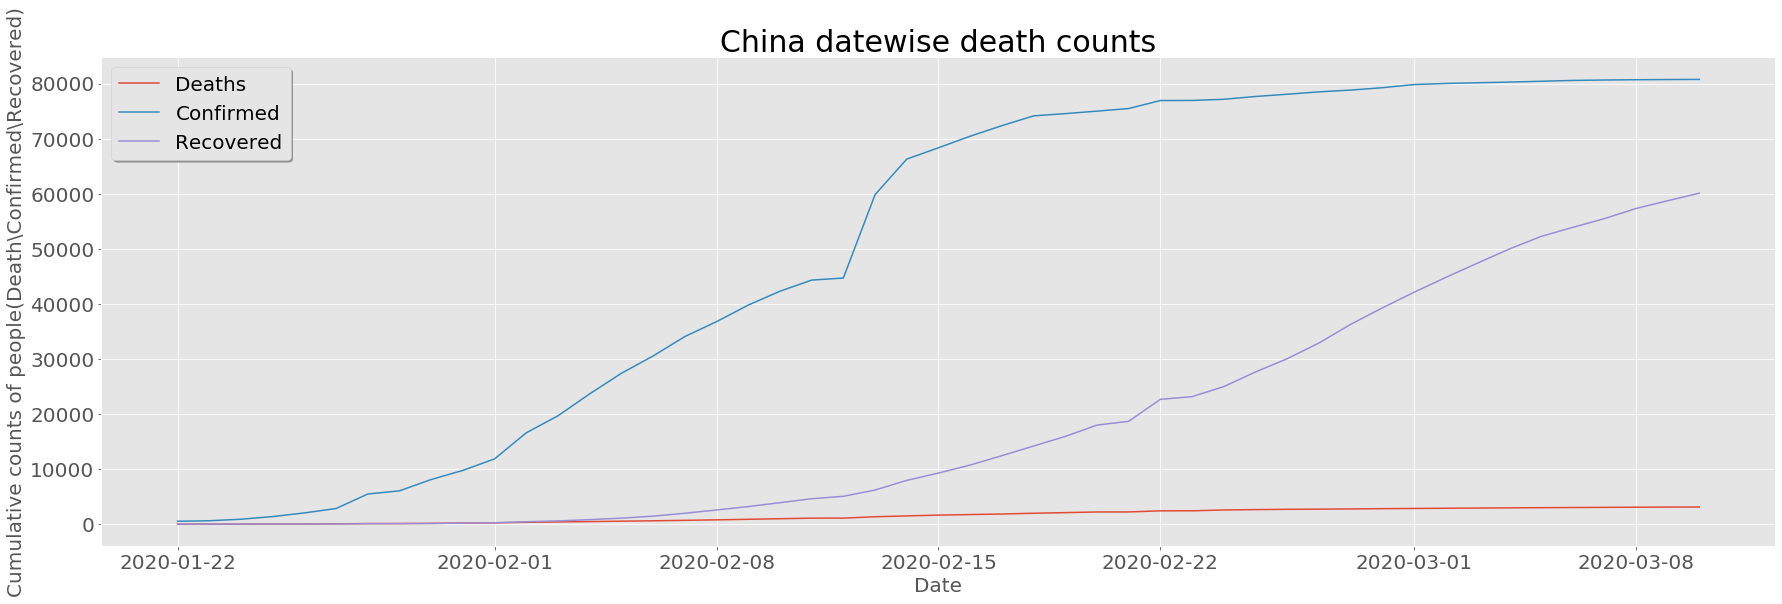

In [310]:

plt.figure(figsize=(30,9))
plt.plot(china_datewise.Date,china_datewise.Deaths,label='Deaths')
plt.plot(china_datewise.Date,china_datewise.Confirmed,label='Confirmed')
plt.plot(china_datewise.Date,china_datewise.Recovered,label='Recovered')
plt.title("China datewise death counts",fontsize=30)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Cumulative counts of people(Death\Confirmed\Recovered)',fontsize=20)
plt.legend(loc='best',fontsize=20,shadow=True)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
#plt.grid()

In [311]:
df_china.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0
1,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0
2,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0
3,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0
4,Gansu,China,36.0611,103.8343,2020-01-22,0,0,0


In [312]:
full_table.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [313]:
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0
1,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0
2,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0
3,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0
4,Gansu,China,36.0611,103.8343,2020-01-22,0,0,0


In [314]:
ship=full_table[full_table['Province/State']=='Diamond Princess cruise ship']

In [315]:
# intially number of rows 
full_table.shape

(19796, 8)

In [316]:
#drop all the rows havimg State 'Diamond Princess cruise ship'
full_table=full_table[full_table['Province/State'] != 'Diamond Princess cruise ship']

In [317]:
#check after dropping the rows
full_table.shape

(19747, 8)

In [318]:
full_lat=full_table[full_table['Date']==max(full_table['Date'])]

In [319]:
full_lat.shape

(403, 8)

In [320]:
full_lat.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
19392,Anhui,China,31.8257,117.2264,2020-03-10,990,6,984
19393,Beijing,China,40.1824,116.4142,2020-03-10,429,8,320
19394,Chongqing,China,30.0572,107.8740,2020-03-10,576,6,547
19395,Fujian,China,26.0789,117.9874,2020-03-10,296,1,295
19396,Gansu,China,36.0611,103.8343,2020-03-10,125,2,88


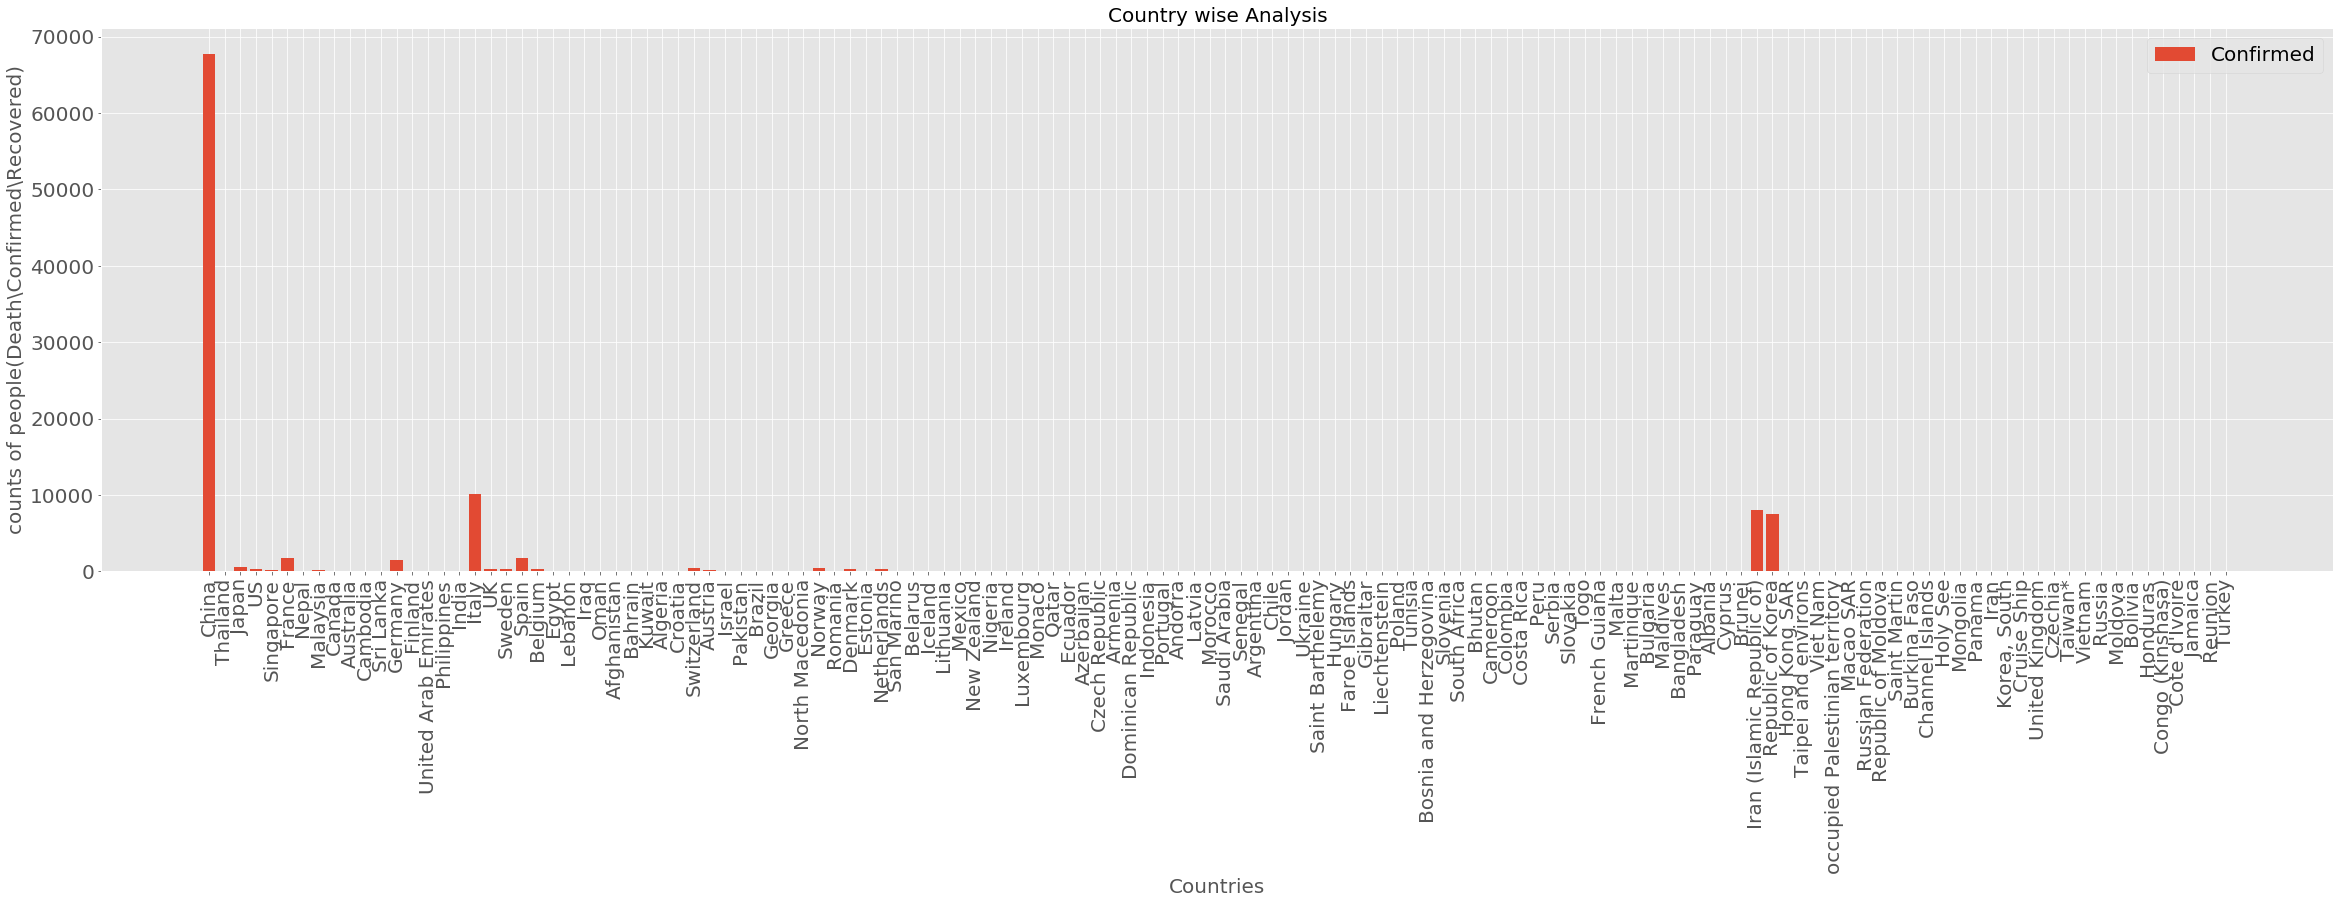

In [329]:
plt.figure(figsize=(40,10))
#plt.bar(full_lat['Country/Region'],full_lat['Deaths'],label='Deaths')
plt.bar(full_lat['Country/Region'],full_lat['Confirmed'],label='Confirmed')
#plt.plot(full_lat['Country/Region'],full_lat['Recovered'],label='Recovered')
plt.title("Country wise Analysis",fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('counts of people(Death\Confirmed\Recovered)',fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xticks(rotation=90)
plt.show()

In [322]:
full_lat_china=full_lat[full_lat['Country/Region']=='China']

In [323]:
full_lat_china.head(64)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
19392,Anhui,China,31.82570,117.2264,2020-03-10,990,6,984
19393,Beijing,China,40.18240,116.4142,2020-03-10,429,8,320
19394,Chongqing,China,30.05720,107.8740,2020-03-10,576,6,547
19395,Fujian,China,26.07890,117.9874,2020-03-10,296,1,295
19396,Gansu,China,36.06110,103.8343,2020-03-10,125,2,88
19397,Guangdong,China,23.34170,113.4244,2020-03-10,1353,8,1274
19398,Guangxi,China,23.82980,108.7881,2020-03-10,252,2,234
19399,Guizhou,China,26.81540,106.8748,2020-03-10,146,2,129
19400,Hainan,China,19.19590,109.7453,2020-03-10,168,6,159
19401,Hebei,China,38.04280,114.5149,2020-03-10,318,6,307


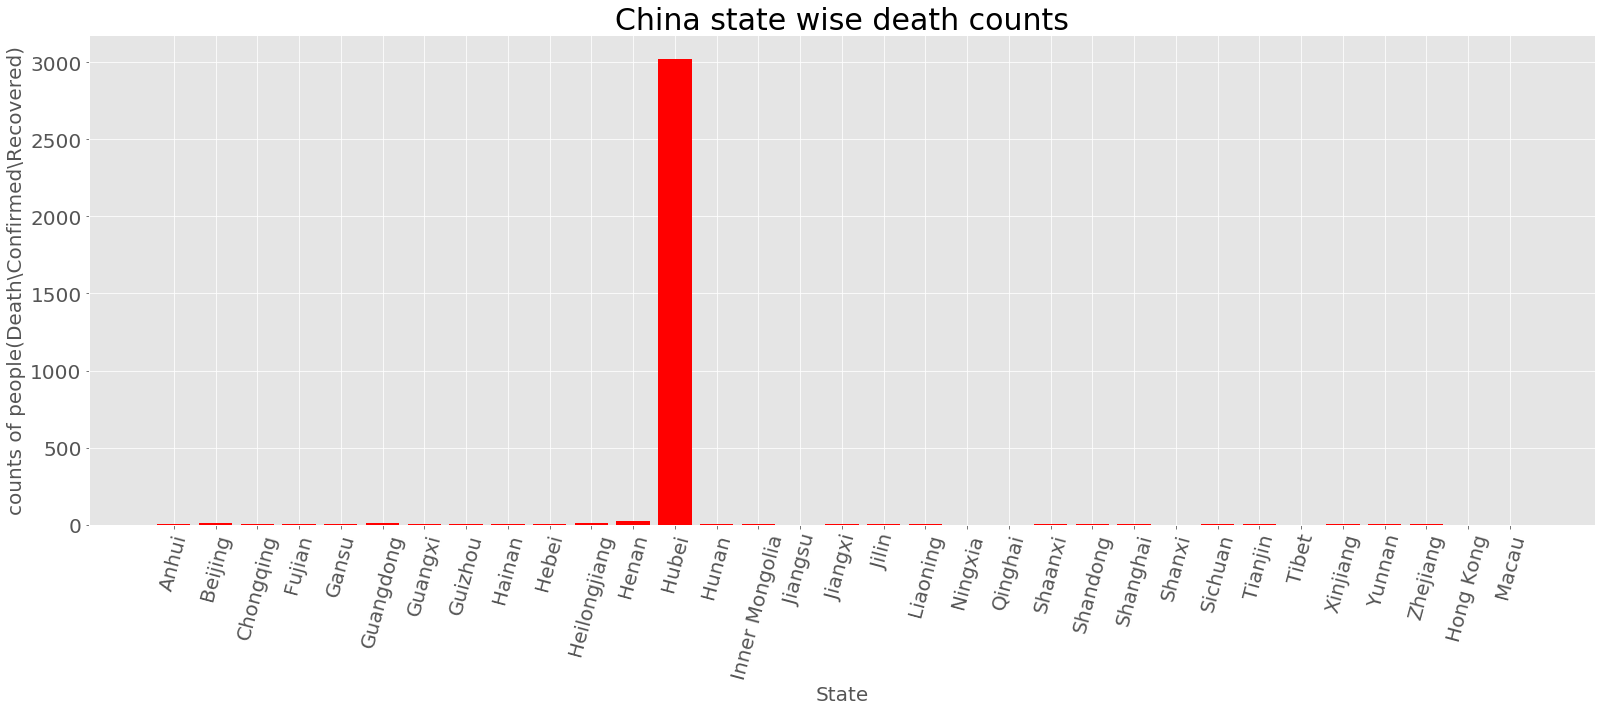

In [330]:
plt.figure(figsize=(27,9))
plt.bar(full_lat_china['Province/State'],full_lat_china.Deaths,label='Confirmed',color='red')
#plt.plot(full_lat_china['Province/State'],full_lat_china.Confirmed,label='Confirmed',color='violet',marker='o',linestyle='dashed')
#plt.plot(full_lat_china['Province/State'],full_lat_china.Recovered,label='Recovered',color='green',marker='o')
plt.title("China state wise death counts",fontsize=30)
plt.xlabel('State',fontsize=20)
plt.ylabel('counts of people(Death\Confirmed\Recovered)',fontsize=20)
#plt.legend(loc='best',fontsize=20,shadow=True)
#plt.rc('xtick',labelsize=20)
#plt.rc('ytick',labelsize=20)
#plt.style.use('ggplot')
plt.xticks(rotation=75)
#plt.grid()
plt.show()

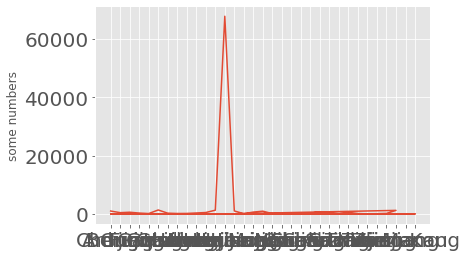

In [325]:
import matplotlib.pyplot as plt
%matplotlib inline 
#import matplotlib.colors as mcolors
x=full_lat_china['Province/State']
y=full_lat_china['Confirmed']
plt.plot(x,y)
plt.ylabel('some numbers')
plt.show()

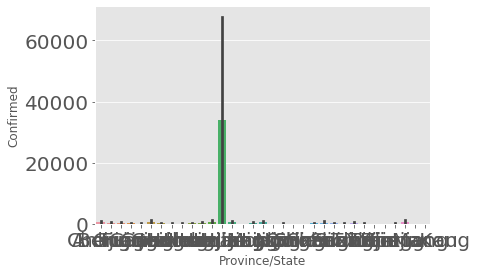

In [326]:

sns.barplot(x='Province/State',y='Confirmed',data=full_lat_china)
plt.show()

<BarContainer object of 64 artists>

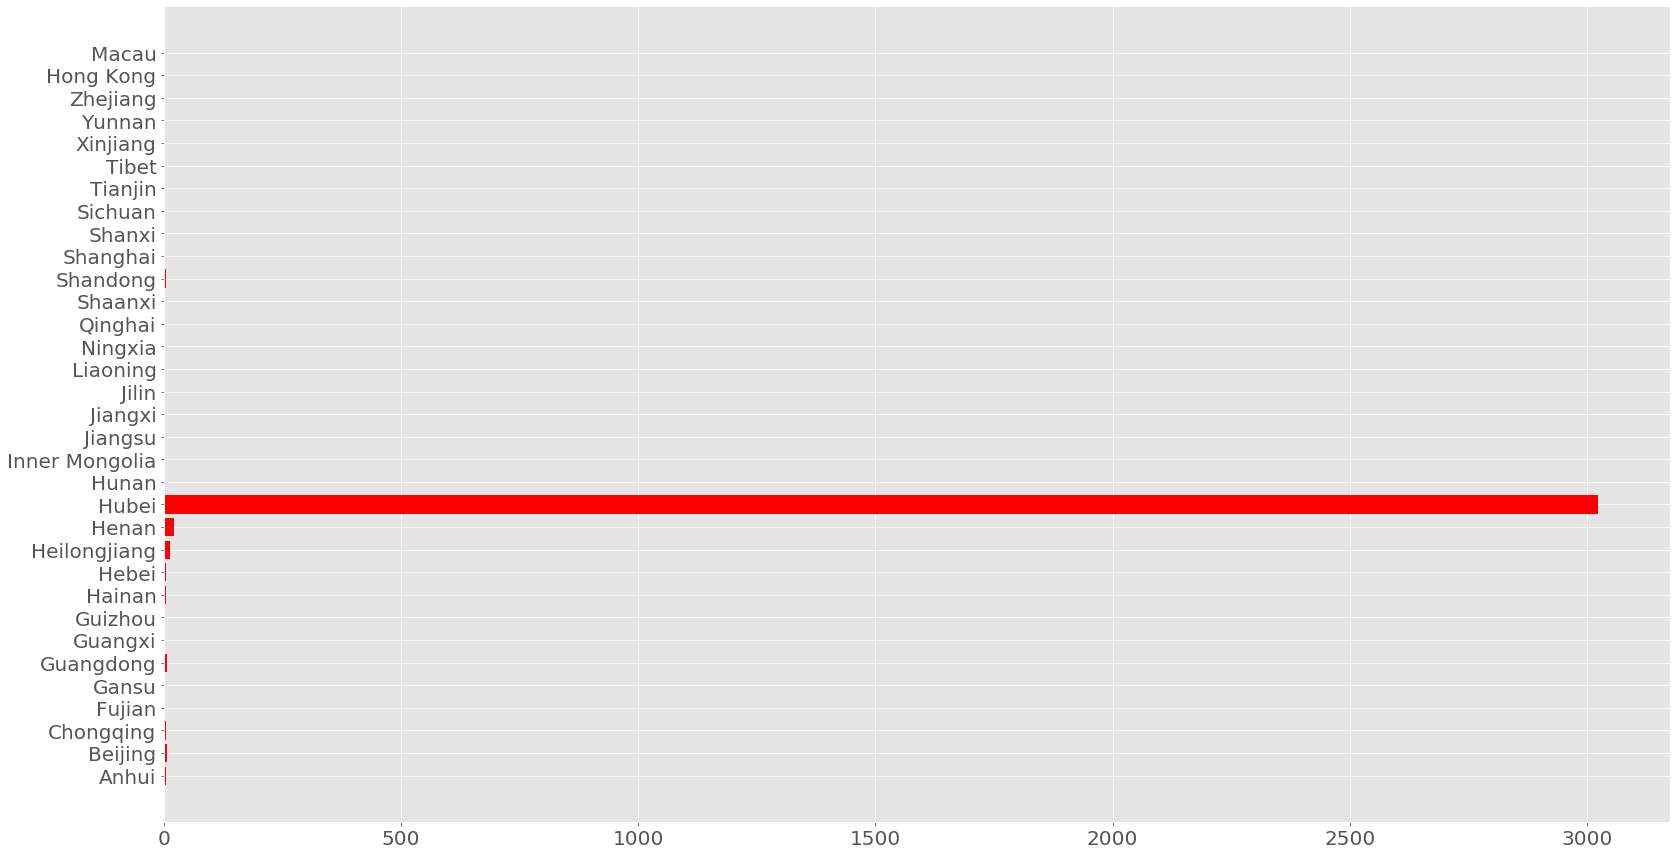

In [327]:
x=full_lat_china['Province/State']
y=full_lat_china['Deaths']
plt.figure(figsize=(27,15))
#plt.style.use('ggplot')
#x_pos = [i for i, _ in enumerate(x)]

plt.barh(x, y, color='Red')